


# **Data mining**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !pip install tweepy --upgrade

In [ ]:
# %run ./drive/MyDrive/Nauczanie/my_keys.ipynb

In [ ]:
# import tweepy
# import json

In [ ]:
# client = tweepy.Client(bearer_token=bearer_token)

In [ ]:
# query = 'war -is:retweet lang:en'

In [ ]:
# start_time = '2022-05-27T15:28:51.818095+00:00'
# end_time = '2022-06-02T00:27:51.818095+00:00'

# # count = 210119



### Saving tweets to a file


In [ ]:
# with open('tweets 165669.txt', 'a+') as f:
#   for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                                
#                                 tweet_fields=['created_at'],
#                                 start_time=start_time,
#                                 end_time=end_time,
#                                 max_results=100).flatten(limit=100000):
#     f.write(tweet.text + '\t' + str(tweet.id) + '\t' + str(tweet.created_at) + '\n')
#     count+=1
#     end_time = tweet.created_at


# **Data cleaning**

In [ ]:
import re 
import pandas as pd
import nltk
import io
from google.colab import files
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import ngrams
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.stem import WordNetLemmatizer
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
import multiprocessing
from sklearn.cluster import KMeans
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import gensim


warnings.filterwarnings(action = 'ignore')

In [ ]:
s = ''
l = []
with open('tweets 165669 (1).txt') as f:
    line = f.readline()
    while line:
        line = f.readline()
        if re.search('(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2}):(\d{2})\+(\d{2}):(\d{2})', line):
          s = s + line
          l.append(s)
          s = ''
        else:
          s = s + line
        

In [ ]:
df = pd.DataFrame(l)

In [ ]:
df[['Text','Index','Date']] = df[0].str.split('\t', expand=True)[[0,1,2]]

In [ ]:
df.drop(columns=[0], inplace=True)

In [ ]:
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-ї \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data_clean = clean_text(df, "Text", 'text_clean')
data_clean.head()

,Text,Index,Date,text_clean
0,First we must get the public to truly recogniz...,1529847032634023938,2022-05-26 15:28:50+00:00\n,first we must get the public to truly recogniz...
1,@davidfrum @raehanbobby Cowards would kill onl...,1529847030889193473,2022-05-26 15:28:50+00:00\n,cowards would kill only childreni dont want ...
2,"Horizon Zero Dawn is getting a netflix series,...",1529847029341511680,2022-05-26 15:28:49+00:00\n,horizon zero dawn is getting a netflix series ...
3,@N0rthc0teW1nd1r @rok_straus @Food_EU What’s i...,1529847027651198976,2022-05-26 15:28:49+00:00\n,straus eu whats it like losing every war youv...
4,"@Janet115turner @KyivIndependent yep, I just s...",1529847026212651010,2022-05-26 15:28:48+00:00\n,yep i just said the lockdown will last one ...


In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.drop_duplicates(subset='text_clean', inplace=True, ignore_index=False)
data_clean.reset_index(drop=True, inplace=True)
data_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Index,Date,text_clean
0,First we must get the public to truly recogniz...,1529847032634023938,2022-05-26 15:28:50+00:00\n,first must get public truly recognize establis...
1,@davidfrum @raehanbobby Cowards would kill onl...,1529847030889193473,2022-05-26 15:28:50+00:00\n,cowards would kill childreni dont want childre...
2,"Horizon Zero Dawn is getting a netflix series,...",1529847029341511680,2022-05-26 15:28:49+00:00\n,horizon zero dawn getting netflix series god w...
3,@N0rthc0teW1nd1r @rok_straus @Food_EU What’s i...,1529847027651198976,2022-05-26 15:28:49+00:00\n,straus eu whats like losing every war youve st...
4,"@Janet115turner @KyivIndependent yep, I just s...",1529847026212651010,2022-05-26 15:28:48+00:00\n,yep said lockdown last one two three years sho...


In [ ]:
df['text_clean'][0]

'first must get public truly recognize establishment political class tandem corporate interests waging class war working class decades'

In [ ]:
nltk.download('punkt')
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Text,Index,Date,text_clean,text_tokens
0,First we must get the public to truly recogniz...,1529847032634023938,2022-05-26 15:28:50+00:00\n,first must get public truly recognize establis...,"[first, must, get, public, truly, recognize, e..."
1,@davidfrum @raehanbobby Cowards would kill onl...,1529847030889193473,2022-05-26 15:28:50+00:00\n,cowards would kill childreni dont want childre...,"[cowards, would, kill, childreni, dont, want, ..."
2,"Horizon Zero Dawn is getting a netflix series,...",1529847029341511680,2022-05-26 15:28:49+00:00\n,horizon zero dawn getting netflix series god w...,"[horizon, zero, dawn, getting, netflix, series..."
3,@N0rthc0teW1nd1r @rok_straus @Food_EU What’s i...,1529847027651198976,2022-05-26 15:28:49+00:00\n,straus eu whats like losing every war youve st...,"[straus, eu, whats, like, losing, every, war, ..."
4,"@Janet115turner @KyivIndependent yep, I just s...",1529847026212651010,2022-05-26 15:28:48+00:00\n,yep said lockdown last one two three years sho...,"[yep, said, lockdown, last, one, two, three, y..."


In [ ]:
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_tokens_stem'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,Text,Index,Date,text_clean,text_tokens,text_tokens_stem
0,First we must get the public to truly recogniz...,1529847032634023938,2022-05-26 15:28:50+00:00\n,first must get public truly recognize establis...,"[first, must, get, public, truly, recognize, e...","[first, must, get, public, truli, recogn, esta..."
1,@davidfrum @raehanbobby Cowards would kill onl...,1529847030889193473,2022-05-26 15:28:50+00:00\n,cowards would kill childreni dont want childre...,"[cowards, would, kill, childreni, dont, want, ...","[coward, would, kill, childreni, dont, want, c..."
2,"Horizon Zero Dawn is getting a netflix series,...",1529847029341511680,2022-05-26 15:28:49+00:00\n,horizon zero dawn getting netflix series god w...,"[horizon, zero, dawn, getting, netflix, series...","[horizon, zero, dawn, get, netflix, seri, god,..."
3,@N0rthc0teW1nd1r @rok_straus @Food_EU What’s i...,1529847027651198976,2022-05-26 15:28:49+00:00\n,straus eu whats like losing every war youve st...,"[straus, eu, whats, like, losing, every, war, ...","[strau, eu, what, like, lose, everi, war, youv..."
4,"@Janet115turner @KyivIndependent yep, I just s...",1529847026212651010,2022-05-26 15:28:48+00:00\n,yep said lockdown last one two three years sho...,"[yep, said, lockdown, last, one, two, three, y...","[yep, said, lockdown, last, one, two, three, y..."


In [ ]:
nltk.download('wordnet')
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Text,Index,Date,text_clean,text_tokens,text_tokens_stem,text_tokens_lemma
0,First we must get the public to truly recogniz...,1529847032634023938,2022-05-26 15:28:50+00:00\n,first must get public truly recognize establis...,"[first, must, get, public, truly, recognize, e...","[first, must, get, public, truli, recogn, esta...","[first, must, get, public, truly, recognize, e..."
1,@davidfrum @raehanbobby Cowards would kill onl...,1529847030889193473,2022-05-26 15:28:50+00:00\n,cowards would kill childreni dont want childre...,"[cowards, would, kill, childreni, dont, want, ...","[coward, would, kill, childreni, dont, want, c...","[coward, would, kill, childreni, dont, want, c..."
2,"Horizon Zero Dawn is getting a netflix series,...",1529847029341511680,2022-05-26 15:28:49+00:00\n,horizon zero dawn getting netflix series god w...,"[horizon, zero, dawn, getting, netflix, series...","[horizon, zero, dawn, get, netflix, seri, god,...","[horizon, zero, dawn, getting, netflix, series..."
3,@N0rthc0teW1nd1r @rok_straus @Food_EU What’s i...,1529847027651198976,2022-05-26 15:28:49+00:00\n,straus eu whats like losing every war youve st...,"[straus, eu, whats, like, losing, every, war, ...","[strau, eu, what, like, lose, everi, war, youv...","[straus, eu, whats, like, losing, every, war, ..."
4,"@Janet115turner @KyivIndependent yep, I just s...",1529847026212651010,2022-05-26 15:28:48+00:00\n,yep said lockdown last one two three years sho...,"[yep, said, lockdown, last, one, two, three, y...","[yep, said, lockdown, last, one, two, three, y...","[yep, said, lockdown, last, one, two, three, y..."


# **Labeling / Tagging**

In [ ]:
sent = [row for row in data_clean['text_tokens_lemma']]

phrases = Phrases(sent, min_count=3, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[1111]

['ar',
 'invented',
 'nazi',
 'use',
 'invented',
 'armalite',
 'news_flash',
 'ar_stand',
 'whole',
 'year',
 'second_world',
 'war',
 'ended',
 'completely',
 'dishonest',
 'took',
 'quick',
 'google_search',
 'find']

In [ ]:
w2v_model = Word2Vec(min_count=4,
                     window=5,
                     size=300,
                     sample=1e-5,
                     alpha=0.03,
                     min_alpha=0.007,
                     negative=20,
                     seed=42,
                     workers=multiprocessing.cpu_count()-1)

w2v_model.build_vocab(data_clean['text_tokens_lemma'], progress_per=50000)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(21545194, 80395980)

In [ ]:
w2v_model.wv.most_similar(positive=['death'])

[('suicide', 0.7850598692893982),
 ('countless', 0.7696276903152466),
 ('accident', 0.7360802888870239),
 ('fatality', 0.7265239357948303),
 ('disproportionate', 0.7253849506378174),
 ('mass', 0.7110586166381836),
 ('disease', 0.7080748081207275),
 ('dying', 0.7075575590133667),
 ('hopeless', 0.7039021253585815),
 ('infection', 0.7036020755767822)]

In [ ]:
w2v_model.wv.most_similar(positive=['creepy'])

[('teddy', 0.9325636625289917),
 ('corny', 0.930824339389801),
 ('sitcom', 0.9245471954345703),
 ('ong', 0.917962908744812),
 ('nun', 0.9176621437072754),
 ('crayon', 0.9130661487579346),
 ('chick', 0.9127805829048157),
 ('frankenstein', 0.9075489044189453),
 ('milf', 0.9053464531898499),
 ('pearl', 0.9049633741378784)]

In [ ]:
w2v_model.save("mojmodelw2v.model")

In [ ]:
word_vecs = w2v_model.wv

In [ ]:
model = KMeans(n_clusters=10, max_iter=10000, random_state=42, n_init=50)
model.fit(X=w2v_model.wv.vectors.astype('double'))

KMeans(max_iter=10000, n_clusters=10, n_init=50, random_state=42)

In [ ]:
w2v_model.wv.vectors.astype('double').shape

(27603, 300)

In [ ]:
w2v_model.wv.vectors.astype('double').shape

(27603, 300)

In [ ]:
word_vecs.similar_by_vector(model.cluster_centers_[1], topn=200, restrict_vocab=None)

[('sekiro', 0.9810385704040527),
 ('newbie', 0.9809954166412354),
 ('yakuza', 0.9782517552375793),
 ('emulator', 0.9755113124847412),
 ('botw', 0.973661482334137),
 ('mecha', 0.9731654524803162),
 ('goldeneye', 0.9722177982330322),
 ('bioshock', 0.9714840054512024),
 ('genshin', 0.97100830078125),
 ('allstar', 0.9703754782676697),
 ('godzilla', 0.9703249335289001),
 ('touhou', 0.970035970211029),
 ('trek', 0.9697628021240234),
 ('roblox', 0.9683464169502258),
 ('homebrew', 0.9680747985839844),
 ('bl', 0.9678802490234375),
 ('leviathan', 0.9676868319511414),
 ('sega', 0.9674575328826904),
 ('fusion', 0.9669197797775269),
 ('penguin', 0.9667873382568359),
 ('alicization', 0.9667166471481323),
 ('capcom', 0.9648696780204773),
 ('vtuberuprising', 0.9643778800964355),
 ('dmc', 0.9640649557113647),
 ('lotr', 0.9638546705245972),
 ('overwatch', 0.9637309312820435),
 ('madden', 0.963639497756958),
 ('zelda', 0.9629133939743042),
 ('sims', 0.9627419114112854),
 ('lan', 0.9621090888977051),
 ('r

In [ ]:
word_vecs.similar_by_vector(model.cluster_centers_[3], topn=10, restrict_vocab=None)

[('twofaced', 0.9844157695770264),
 ('antilife', 0.979657769203186),
 ('repubes', 0.9786496162414551),
 ('boogeyman', 0.9716544151306152),
 ('rightyou', 0.9711293578147888),
 ('againbut', 0.9698745012283325),
 ('snarky', 0.9672703742980957),
 ('classist', 0.967185378074646),
 ('repugnant', 0.96700119972229),
 ('asshats', 0.9657920002937317)]

In [ ]:
df2 = pd.DataFrame

In [ ]:
df2 = pd.DataFrame((word_vecs.similar_by_vector(model.cluster_centers_[0], topn=200, restrict_vocab=None)),
                   columns=['cluster_0', 'p_0'])

In [ ]:
df2[['cluster_1', 'p_1']] = word_vecs.similar_by_vector(model.cluster_centers_[1], topn=200, restrict_vocab=None)

In [ ]:
df2[['cluster_2', 'p_2']] = word_vecs.similar_by_vector(model.cluster_centers_[2], topn=200, restrict_vocab=None)

In [ ]:
df2.to_csv('kmean.csv', index=False)

# **Test**

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['first', 'must', 'get', 'public', 'truly', 'recognize', 'establishment', 'political_class', 'tandem', 'corporate', 'interest', 'waging_class', 'war', 'working_class', 'decade'], tags=[0]),
 TaggedDocument(words=['coward', 'would', 'kill', 'childreni', 'dont_want', 'child', 'living', 'war', 'zone'], tags=[1]),
 TaggedDocument(words=['horizon_zero', 'dawn', 'getting', 'netflix_series', 'god', 'war', 'getting', 'series_amazon', 'hyped'], tags=[2]),
 TaggedDocument(words=['straus_eu', 'whats', 'like', 'losing', 'every', 'war', 'youve', 'started', 'upset'], tags=[3]),
 TaggedDocument(words=['yep', 'said', 'lockdown', 'last', 'one', 'two_three', 'year', 'short', 'time', 'effect', 'war', 'change', 'global', 'relation', 'decade'], tags=[4]),
 TaggedDocument(words=['russian_army', 'continues_shell', 'ukrainian_city', 'every_day', 'allowing_russian', 'tennis_player', 'participate_championship', 'support', 'war', 'ukraine', 'killing_civilian', 'child_deprive', 'russian_oppo

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 30)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab

{'first': <gensim.models.keyedvectors.Vocab at 0x7f7b135b5710>,
 'must': <gensim.models.keyedvectors.Vocab at 0x7f7b26190790>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7f7b135a8f50>,
 'public': <gensim.models.keyedvectors.Vocab at 0x7f7b135aafd0>,
 'truly': <gensim.models.keyedvectors.Vocab at 0x7f7b135aac50>,
 'recognize': <gensim.models.keyedvectors.Vocab at 0x7f7b135aad10>,
 'establishment': <gensim.models.keyedvectors.Vocab at 0x7f7b13f4a990>,
 'political_class': <gensim.models.keyedvectors.Vocab at 0x7f7b24998c10>,
 'tandem': <gensim.models.keyedvectors.Vocab at 0x7f7b135aae10>,
 'corporate': <gensim.models.keyedvectors.Vocab at 0x7f7b135aacd0>,
 'interest': <gensim.models.keyedvectors.Vocab at 0x7f7b135b8310>,
 'waging_class': <gensim.models.keyedvectors.Vocab at 0x7f7b135b8450>,
 'war': <gensim.models.keyedvectors.Vocab at 0x7f7b135b84d0>,
 'working_class': <gensim.models.keyedvectors.Vocab at 0x7f7b135b8510>,
 'decade': <gensim.models.keyedvectors.Vocab at 0x7f7b135b8550>

In [ ]:
test_doc = word_tokenize(data_clean['text_clean'][1])
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

# positive = List of sentences that contribute positively.


[(58716, 0.901763916015625),
 (106931, 0.8710850477218628),
 (22707, 0.8686507940292358),
 (17096, 0.8684112429618835),
 (120245, 0.867866575717926),
 (156010, 0.8658073544502258),
 (1, 0.8631168603897095),
 (24405, 0.862931489944458),
 (116595, 0.8626552820205688),
 (172521, 0.8613702058792114)]

In [ ]:
model_1 = KMeans(n_clusters=3, max_iter=10000, random_state=42, n_init=50)
model_1.fit(X=model.wv.vectors.astype('double'))

KMeans(max_iter=10000, n_clusters=3, n_init=50, random_state=42)

In [ ]:
# model.docvecs.most_similar(model_1.cluster_centers_[0], topn=10)
model.docvecs.most_similar([model_1.cluster_centers_[2]], topn=10)


[(43766, 0.9870518445968628),
 (55830, 0.9848588705062866),
 (172392, 0.983126699924469),
 (103736, 0.9827946424484253),
 (64258, 0.9823917150497437),
 (152054, 0.9816192388534546),
 (47392, 0.9813424348831177),
 (33967, 0.9813272953033447),
 (56416, 0.9798203110694885),
 (148286, 0.9792277812957764)]

In [ ]:
data_clean['Text'][164326]

'15,000 Suspected War Crimes Reported In\xa0Ukraine https://t.co/iTh3mUq49R'

In [ ]:
model.wv.vectors.astype('double').shape

(169095, 20)

In [ ]:
model_1.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

# Modeling

In [3]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [5]:
# df = pd.read_csv('tweet_clean_data1 (1).csv')
df = pd.read_csv('text_data (1).csv')

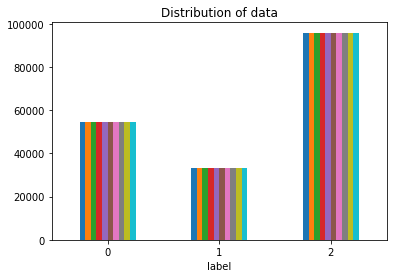

In [6]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['0','1', '2'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text_clean']), list(df['label'])

In [7]:
def stringToList(string):
    listRes = string.replace("\n", "").replace("[", "").replace("]", "").strip()
    listRes = re.sub(r"  *", " ", listRes)
    listRes = listRes.split(" ")
    listRes = [float(x) for x in listRes]
    return listRes

In [8]:
df.vectors = df.vectors.apply(lambda x: stringToList(x))

In [9]:
df.vectors = df.vectors.apply(lambda x: np.array(x))

In [10]:
X=np.concatenate(df.vectors).reshape(183625,-1)
y=df.label

In [70]:
# Separating the 70% data for training data and 30% for testing data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =11)

In [12]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['0','1', '2']
  group_names = ['True 0','False 1 ', 'False 2','False 0', 'True 1','False 2','False 0', 'False 1','True 2']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(3,3)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [13]:
dict_of_predictions = {}

#**Bernoulli Naive Bayes**

              precision    recall  f1-score   support

           0       0.68      0.71      0.70     16252
           1       0.59      0.30      0.40     10022
           2       0.74      0.84      0.79     28814

    accuracy                           0.71     55088
   macro avg       0.67      0.62      0.63     55088
weighted avg       0.69      0.71      0.69     55088



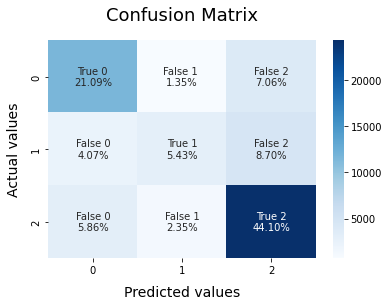

In [14]:
BNBmodel = BernoulliNB(alpha=0.5)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred_bayes = BNBmodel.predict(X_test)
dict_of_predictions['Bernoulli Naive Bayes'] = y_pred_bayes

In [ ]:
# from sklearn.metrics import roc_curve, auc
# y_pred_binary = label_binarize(y_pred1, classes=[0,1,2])
# y_test_binary = label_binarize(y_test, classes=[0,1,2])


# n_classes = 3

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_binary[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
    


# # Plot of a ROC curve for a specific class
# for i in range(n_classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'Receiver operating characteristic for {i} class')
#     plt.legend(loc="lower right")
#     plt.show()

# **Linear Support Vector Classification.**

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     16252
           1       0.84      0.66      0.74     10022
           2       0.84      0.93      0.88     28814

    accuracy                           0.84     55088
   macro avg       0.84      0.79      0.81     55088
weighted avg       0.84      0.84      0.84     55088



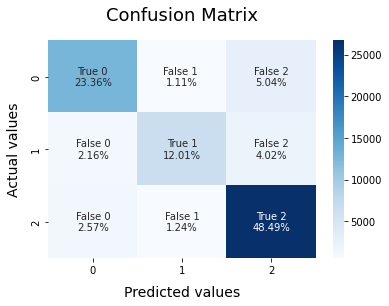

In [12]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred_LinearSVC = SVCmodel.predict(X_test)
dict_of_predictions['Linear Support Vector Classification'] = y_pred_LinearSVC

#**Logistic Regression**

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     16252
           1       0.81      0.72      0.76     10022
           2       0.86      0.91      0.89     28814

    accuracy                           0.84     55088
   macro avg       0.83      0.81      0.82     55088
weighted avg       0.84      0.84      0.84     55088



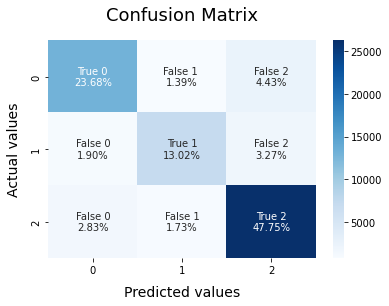

In [13]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred_LogisticRegression = LRmodel.predict(X_test)
dict_of_predictions['Logistic Regression'] = y_pred_LogisticRegression

#**Receiver operating characteristic**

In [22]:
def custom_roc_curve(dict_of_predictions: dict, y_test) -> None: 
  fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
  y_test_binary = label_binarize(y_test, classes=[0,1,2])
  for num, key in enumerate(dict_of_predictions):
    y_pred = label_binarize(dict_of_predictions[key], classes=[0,1,2])
    
    n_classes = 3

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        

    # Plot of a ROC curve for a specific class
    

    for i in range(n_classes):
        
        axs[num,i].plot(fpr[i], tpr[i], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[i])
        axs[num,i].plot([0, 1], [0, 1], 'k--')
        axs[num,i].axis(xmin=0.0,xmax=1.0)
        axs[num,i].axis(ymin=0.0,ymax=1.05)
        axs[num,i].set_xlabel('False Positive Rate')
        axs[num,i].set_ylabel('True Positive Rate')

        axs[num,i].set_title(f'Class {i} and {key}')
        axs[num,i].legend(loc="lower right")
        fig.suptitle('Receiver operating characteristic')
    
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  plt.show()

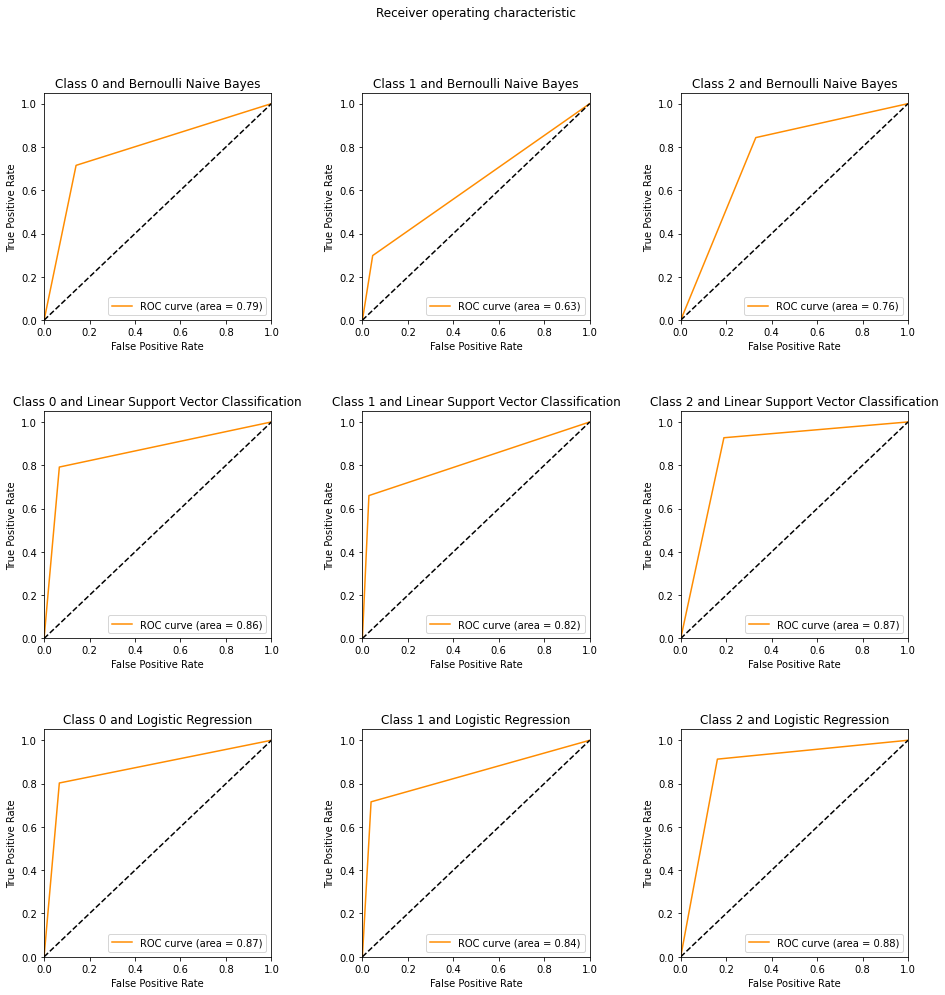

In [23]:
custom_roc_curve(dict_of_predictions, y_test)

#**NN - Analysis**

In [ ]:
X_train, X_test, y_train, y_test

In [15]:
X_train.shape

(128537, 20)

In [119]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))
        if logs.get('accuracy') > 0.95:
            print("Accuracy over 95%... Stopping training")
            self.model.stop_training = True

my_callback = CustomCallback()

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler

#creates a function that updates the learning rate based on the epoch number
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.01
    else:
        return lr * 0.99

lr_scheduler = LearningRateScheduler(scheduler)

(20,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

#input dimensions is equal to number of words tokenized (defined above)
input_dim = 10_000
# input length will be the length of our padded sequences
input_length = 20


#defines a text classifier model
model = Sequential([
    Embedding(input_dim=input_dim, output_dim=64, input_length=input_length),
    Bidirectional(LSTM(150)),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

model.summary()

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy



#defines a text classifier model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(1,20)),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='sigmoid')
])

model.compile(
    loss='SparseCategoricalCrossentropy',
    optimizer=Adam(),
    metrics=[SparseCategoricalAccuracy()]
)
model.build()
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 1, 1024)           21504     
                                                                 
 dropout_51 (Dropout)        (None, 1, 1024)           0         
                                                                 
 dense_92 (Dense)            (None, 1, 512)            524800    
                                                                 
 dropout_52 (Dropout)        (None, 1, 512)            0         
                                                                 
 dense_93 (Dense)            (None, 1, 256)            131328    
                                                                 
 dropout_53 (Dropout)        (None, 1, 256)            0         
                                                                 
 dense_94 (Dense)            (None, 1, 3)            

In [135]:
Xn = np.array(X_train.reshape(-1, 1, 20))
X_test = np.array(X_test.reshape(-1, 1, 20))


#trains the model
history = model.fit(
    Xn, #must convert to numpy array before sending to model
    y_train,       #must convert to numpy array before sending to model
    epochs=30, 
    batch_size=128,                
    # callbacks=[my_callback, lr_scheduler], 
    callbacks=[lr_scheduler], 
    validation_data=(X_test, y_test),
    verbose=1)


Epoch 1/30
1005/1005 [==============================] - 28s 27ms/step - loss: 0.5202 - sparse_categorical_accuracy: 0.8057 - val_loss: 0.4249 - val_sparse_categorical_accuracy: 0.8295 - lr: 0.0100
Epoch 2/30
1005/1005 [==============================] - 27s 27ms/step - loss: 0.5136 - sparse_categorical_accuracy: 0.8103 - val_loss: 0.4383 - val_sparse_categorical_accuracy: 0.8292 - lr: 0.0100
Epoch 3/30
1005/1005 [==============================] - 26s 26ms/step - loss: 0.5154 - sparse_categorical_accuracy: 0.8102 - val_loss: 0.4056 - val_sparse_categorical_accuracy: 0.8411 - lr: 0.0099
Epoch 4/30
1005/1005 [==============================] - 26s 26ms/step - loss: 0.5003 - sparse_categorical_accuracy: 0.8152 - val_loss: 0.4261 - val_sparse_categorical_accuracy: 0.8392 - lr: 0.0098
Epoch 5/30
1005/1005 [==============================] - 28s 28ms/step - loss: 0.4999 - sparse_categorical_accuracy: 0.8149 - val_loss: 0.4102 - val_sparse_categorical_accuracy: 0.8418 - lr: 0.0097
Epoch 6/30
1005

In [126]:
predictions = model(Xn[:1]).numpy()
predictions

array([[[0.39221507, 0.3604023 , 0.9860373 ]]], dtype=float32)